# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}") 


Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get the JSON response
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | chifeng
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | south hedland
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | thulamahashi
Processing Record 9 of Set 1 | susuman
Processing Record 10 of Set 1 | mil'kovo
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | brandon
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mocimboa
Processing Record 16 of Set 1 | inhambane
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of Set 1 | dudinka
Proce

In [45]:
# Convert the city data to a DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chifeng,42.2683,118.9636,64.99,52,98,6.85,CN,2023-05-28 18:58:42
1,waitangi,-43.9535,-176.5597,58.82,86,52,5.99,NZ,2023-05-28 18:58:22
2,uturoa,-16.7333,-151.4333,81.52,75,77,21.27,PF,2023-05-28 18:58:43
3,puerto natales,-51.7236,-72.4875,39.79,97,100,3.60,CL,2023-05-28 18:58:22
4,mount gambier,-37.8333,140.7667,54.79,84,94,7.14,AU,2023-05-28 18:58:43


In [47]:
# Export the city data to a CSV file in the output_data folder
city_data_df.to_csv("output_data/city_data.csv", index_label="City_ID")


In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/city_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chifeng,42.2683,118.9636,64.99,52,98,6.85,CN,2023-05-28 18:58:42
1,waitangi,-43.9535,-176.5597,58.82,86,52,5.99,NZ,2023-05-28 18:58:22
2,uturoa,-16.7333,-151.4333,81.52,75,77,21.27,PF,2023-05-28 18:58:43
3,puerto natales,-51.7236,-72.4875,39.79,97,100,3.60,CL,2023-05-28 18:58:22
4,mount gambier,-37.8333,140.7667,54.79,84,94,7.14,AU,2023-05-28 18:58:43


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

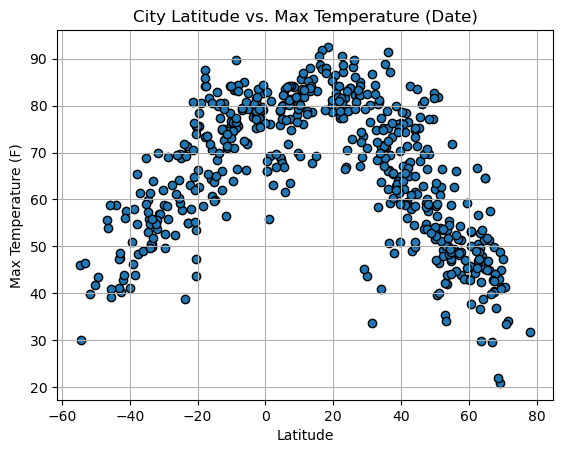

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

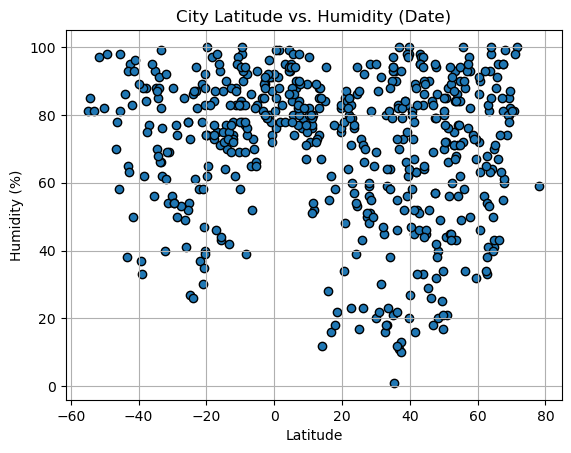

In [50]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

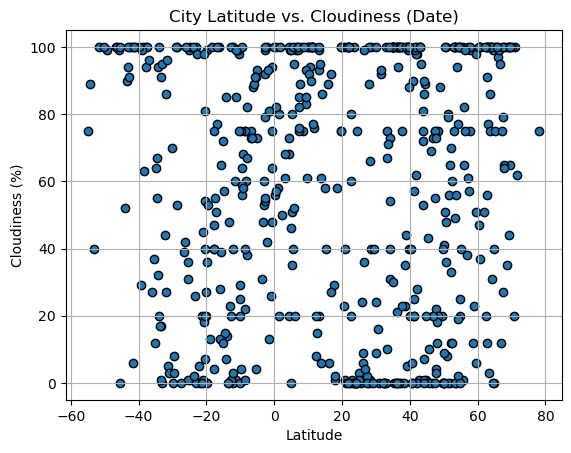

In [51]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

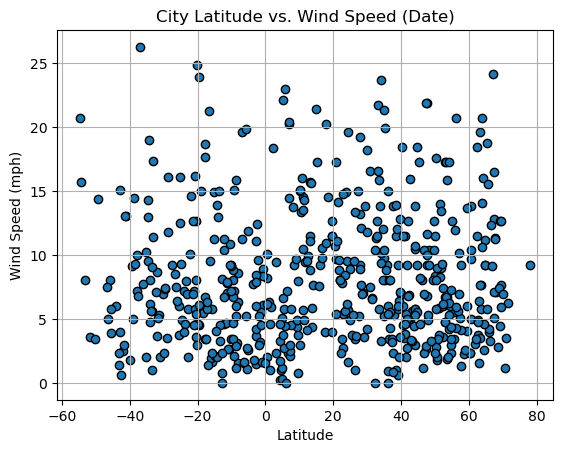

In [52]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the equation of the line on the plot
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the plot
    plt.savefig(file_name)
    
    # Show the plot
    plt.show()


In [54]:
# Filter the city data for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chifeng,42.2683,118.9636,64.99,52,98,6.85,CN,2023-05-28 18:58:42
8,susuman,62.7833,148.1667,50.61,33,91,3.78,RU,2023-05-28 18:58:44
9,mil'kovo,55.6078,37.7956,49.51,72,1,5.57,RU,2023-05-28 18:58:44
10,tiksi,71.6872,128.8694,34.23,100,62,6.24,RU,2023-05-28 18:58:45
11,anadyr,64.7500,177.4833,45.10,70,0,11.18,RU,2023-05-28 18:58:45


In [55]:
# Filter the city data for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,58.82,86,52,5.99,NZ,2023-05-28 18:58:22
2,uturoa,-16.7333,-151.4333,81.52,75,77,21.27,PF,2023-05-28 18:58:43
3,puerto natales,-51.7236,-72.4875,39.79,97,100,3.60,CL,2023-05-28 18:58:22
4,mount gambier,-37.8333,140.7667,54.79,84,94,7.14,AU,2023-05-28 18:58:43
5,south hedland,-20.4089,118.5983,53.53,40,54,8.05,AU,2023-05-28 18:58:43


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.57


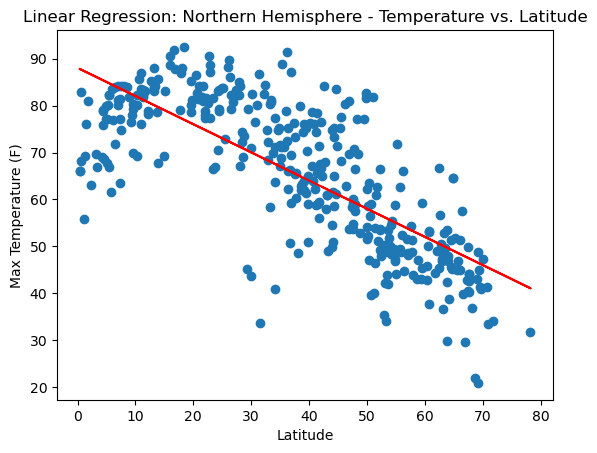

In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, color='red')
    
    # Annotate the equation of the line on the plot
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(equation, coordinates, fontsize=15, color='red')
    
    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print the r-squared value
    print(f"The r-squared is: {round(rvalue**2, 2)}")
    
    # Show the plot
    plt.show()

# Perform linear regression on Northern Hemisphere temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Temperature vs. Latitude",
                       "Latitude", "Max Temperature (F)", (0, -30))


The r-squared is: 0.68


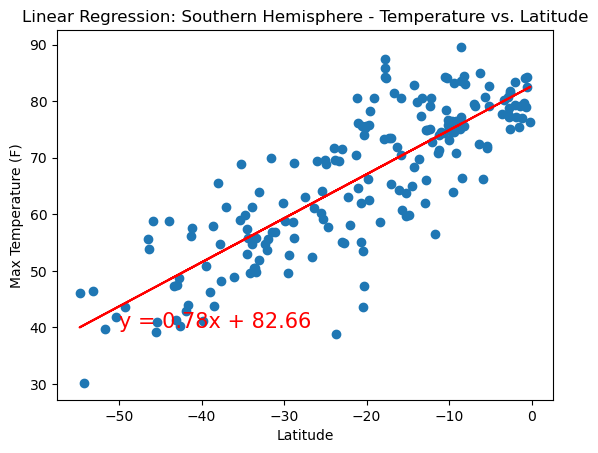

In [57]:
# Perform linear regression on Southern Hemisphere temperature vs latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression: Southern Hemisphere - Temperature vs. Latitude",
                       "Latitude", "Max Temperature (F)", (-50, 40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.57


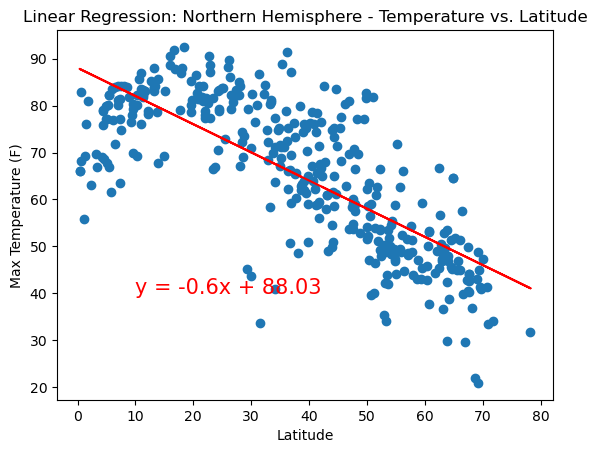

In [58]:
# Perform linear regression on Northern Hemisphere temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Temperature vs. Latitude",
                       "Latitude", "Max Temperature (F)", (10, 40))


The r-squared is: 0.57


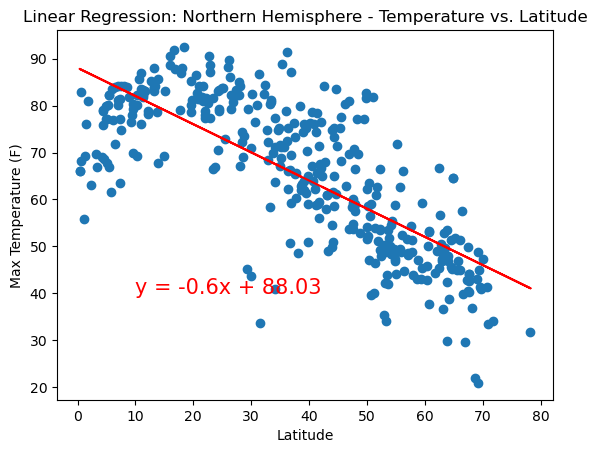

In [59]:
# Perform linear regression on Northern Hemisphere temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Linear Regression: Northern Hemisphere - Temperature vs. Latitude",
                       "Latitude", "Max Temperature (F)", (10, 40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.5732861310444741


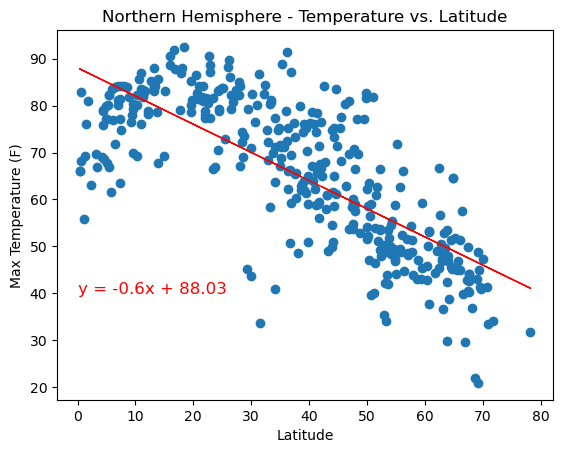

In [60]:
# Perform linear regression on Northern Hemisphere temperature vs latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-", linewidth=1)

# Add regression line equation as annotation
plt.annotate(line_eq, (0, 40), fontsize=12, color="red")

# Set plot title and labels
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Print r-squared value
print(f"R-squared: {r_value**2}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()


In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE